In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

## Let us read the data

In [3]:
salary_data=pd.read_csv("data/Salary_Data.csv")

## Let us see how our data looks like

In [4]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## We will visualize the data with a scatter plot

C:\Users\Maxim\Anaconda3\envs\fastai\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


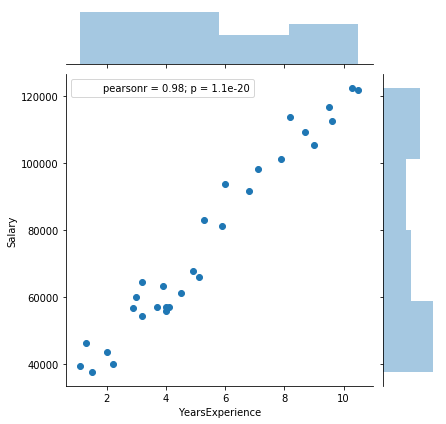

In [5]:
sns.jointplot(salary_data['YearsExperience'], salary_data['Salary'])

### This looks like a nice piece of linear data which can be fit by linear regression. It has no outliers and no missing data

In [6]:
X=salary_data.loc[:,'YearsExperience'].reshape(-1, 1)

y=salary_data.loc[:,'Salary'].reshape(-1, 1)



C:\Users\Maxim\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
C:\Users\Maxim\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


### Let us break the data into training and test sets with a 70/30 ratio

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [11]:
X_train.shape, X_test.shape

((21, 1), (9, 1))

### So we have 21 training samples and 9 test samples

In [14]:
from sklearn import linear_model
linear_regressor=linear_model.LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Let us see how well our regression model has fit the data

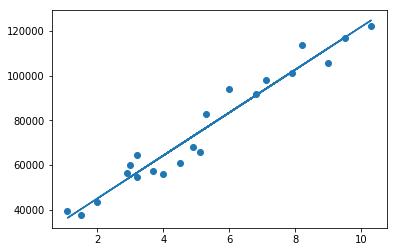

In [16]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train)
plt.plot(X_train, linear_regressor.predict(X_train))

### That seems like quite a nice fit

## Let us move on and predict how much does our model predict as the salary for the test set

In [20]:
y_pred=linear_regressor.predict(X_test.reshape(-1, 1)) ## Though we are predicting salary for a single value, we still have to pass a 2D array

### Let us check how well our model fits the test data

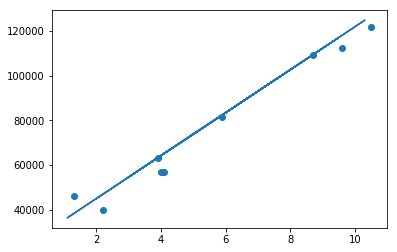

In [27]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test)
plt.plot(X_train, linear_regressor.predict(X_train))

### That is quite a good fit again

In [21]:
y_pred

array([[ 65197.80367965],
       [ 46914.77626919],
       [ 38254.39486423],
       [ 63273.27447855],
       [126782.73811492],
       [ 64235.5390791 ],
       [ 82518.56648957],
       [118122.35670996],
       [109461.975305  ]])

### Let us now calculate the Root Mean Squared Error for our prediction

In [23]:
from sklearn.metrics import mean_squared_error
import math

In [24]:
rmse=math.sqrt(mean_squared_error(y_test, y_pred))

In [25]:
rmse

5646.739170623944

In [26]:
mean_squared_error(y_test, y_pred)

31885663.26105879